In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics


In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


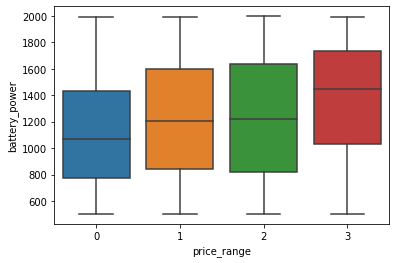

In [4]:
sn.boxplot(x = 'price_range', y = 'battery_power', data = train);

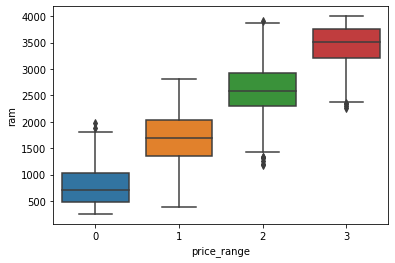

In [5]:
sn.boxplot(x = 'price_range', y = 'ram', data = train);

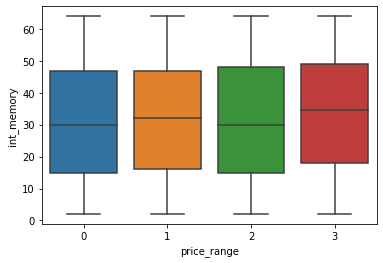

In [6]:
sn.boxplot(x = 'price_range', y = 'int_memory', data = train);

In [7]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [8]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
train.price_range = train.price_range.astype('category')

In [10]:
test.shape
train.shape

(2000, 21)

In [11]:
X = train.drop(['price_range'], axis = 1)

In [12]:
X.shape

(2000, 20)

In [13]:
y = train['price_range']

In [14]:
y.shape

(2000,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)


In [16]:
X_test.shape

(400, 20)

In [17]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [19]:
metrics.accuracy_score(y_test, y_pred)

0.9275

In [20]:
knn = KNeighborsClassifier(n_neighbors= 5)


In [21]:
scores = cross_val_score(knn, X, y , cv = 10, scoring= 'accuracy')

In [22]:
print(scores)

[0.9   0.94  0.92  0.935 0.925 0.95  0.915 0.915 0.915 0.92 ]


In [23]:
print(scores.mean())

0.9235000000000001


In [24]:
k_range = range(1, 41)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X, y , cv = 5, scoring= 'accuracy')
  k_scores.append(scores.mean())

In [25]:
k_scores

[0.908,
 0.8950000000000001,
 0.9195,
 0.9094999999999999,
 0.9195,
 0.9205,
 0.925,
 0.9245000000000001,
 0.931,
 0.9315,
 0.9345000000000001,
 0.93,
 0.9339999999999999,
 0.929,
 0.9299999999999999,
 0.9279999999999999,
 0.9315,
 0.9305,
 0.932,
 0.93,
 0.9295000000000002,
 0.9295000000000002,
 0.9325000000000001,
 0.9280000000000002,
 0.931,
 0.9339999999999999,
 0.933,
 0.9324999999999999,
 0.9305,
 0.9295,
 0.932,
 0.9285,
 0.9280000000000002,
 0.9275,
 0.9289999999999999,
 0.9239999999999998,
 0.9245000000000001,
 0.9244999999999999,
 0.9260000000000002,
 0.9264999999999999]

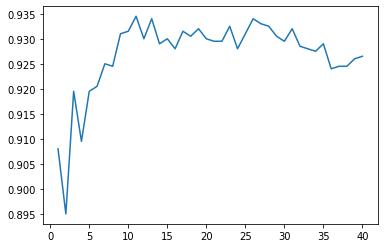

In [26]:
sn.lineplot(x = k_range, y = k_scores);
